In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Machine Learning Datasets\churn_data.csv")

In [3]:
df.head(3)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
df.isnull().sum().sum()

np.int64(0)

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [6]:
df.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,1,0,0,1,2,29.85,2505,0
1,3962,34,1,1,0,3,56.95,1466,0


In [7]:
df.describe()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,32.371149,0.903166,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,2033.283305,24.559481,0.295752,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1760.500000,9.000000,1.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,3521.000000,29.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,5281.500000,55.000000,1.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,7042.000000,72.000000,1.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


In [8]:
df.duplicated().sum().sum()

np.int64(0)

In [9]:
x = df[['tenure', 'PaperlessBilling', 'TotalCharges']]
y = df['Churn']

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [22]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [17]:
x = df[['TotalCharges']]
y = df['Churn']

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [24]:
lr.score(x_train, y_train)*100

73.44692935747248

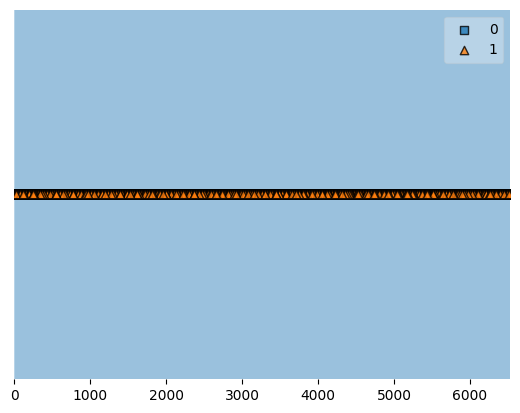

In [19]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=lr)
plt.show()